In [52]:

!pip install plotly
!pip install scikit-learn
!pip install xgboost




Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [53]:
# import libraries:

# 1. to handel the data:
import numpy as np
import pandas as pd

# 2. to visualize the data:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# 3. to preprocess the data:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 4. to build the model:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier

# 5. Metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, f1_score , classification_report, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# 6. to ignore the warnings:
import warnings
warnings.filterwarnings("ignore")

print("Libraries have been loaded successfully")

# 8. Display all rows and columns:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# if you want to see all the rows and columns in the output column, then uncomment the two cells above.

Libraries have been loaded successfully


In [54]:
# Set the dark blue background theme for visualizations
plt.style.use('dark_background')

# Adjust background color to dark blue
plt.rcParams['figure.facecolor'] = '#0d1b2a'
plt.rcParams['axes.facecolor'] = '#0d1b2a'
plt.rcParams['axes.edgecolor'] = '#0d1b2a'
plt.rcParams['savefig.facecolor'] = '#0d1b2a'

# Define a custom color palette with a golden neon effect
golden_neon_palette = sns.color_palette(["#ffd700", "#ffdf00", "#ffec8b", "#ffec00", "#fff700"])

# Apply the custom palette to Seaborn
sns.set_palette(golden_neon_palette)

In [55]:
df = pd.read_csv("Data/star_dataset.csv") 


In [56]:
df = df.rename(columns={
    'Name': 'Name',
    'Distance (ly)': 'Distance',
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Temperature (K)': 'Temperature',
    'Spectral_Class': 'Spectral Class'
})

In [57]:
i = 0

for col in df.columns:
    if i == len(df.columns):
        break
    else:
        print(f"Column {i}: {col}")
    i += 1

Column 0: Name
Column 1: Distance
Column 2: Luminosity
Column 3: Radius
Column 4: Temperature
Column 5: Spectral Class


In [58]:
df.describe()

,Distance,Luminosity,Radius,Temperature
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,295.505327,19644.909442,86.960696,9983.486779
std,541.478403,42223.595017,213.850005,7906.973529
min,3.877798,-4.993141,0.068087,2750.183163
25%,11.716853,10.441039,1.664479,3940.020856
50%,52.031435,171.097809,5.845444,7379.007975
75%,322.865874,10500.577117,33.719778,12055.975095
max,2600.490723,196004.854081,887.097936,28044.279272


In [59]:
df['Name'].value_counts()

Name
Altair              74
Canopus             48
Ross 154            45
Hadar               45
Betelgeuse          44
Castor              39
Capella             39
Arcturus            38
Vega                38
Barnard's Star      38
Mira                37
Bellatrix           37
Alnilam             36
Rigil Kentaurus     36
Polaris             35
Sirius              34
Spica               32
Fomalhaut           31
Procyon             30
Acrux               30
Achernar            29
Lalande 21185       27
Regulus             26
Antares             26
Deneb               25
Alpha Centauri B    24
Wolf 359            22
Aldebaran           18
Rigel               17
Name: count, dtype: int64

In [60]:
df['Name'].unique()

array(['Altair', 'Deneb', "Barnard's Star", 'Polaris', 'Sirius',
       'Fomalhaut', 'Capella', 'Bellatrix', 'Castor', 'Hadar',
       'Betelgeuse', 'Regulus', 'Mira', 'Acrux', 'Vega', 'Lalande 21185',
       'Arcturus', 'Alpha Centauri B', 'Ross 154', 'Canopus', 'Procyon',
       'Wolf 359', 'Antares', 'Alnilam', 'Rigil Kentaurus', 'Spica',
       'Achernar', 'Aldebaran', 'Rigel'], dtype=object)

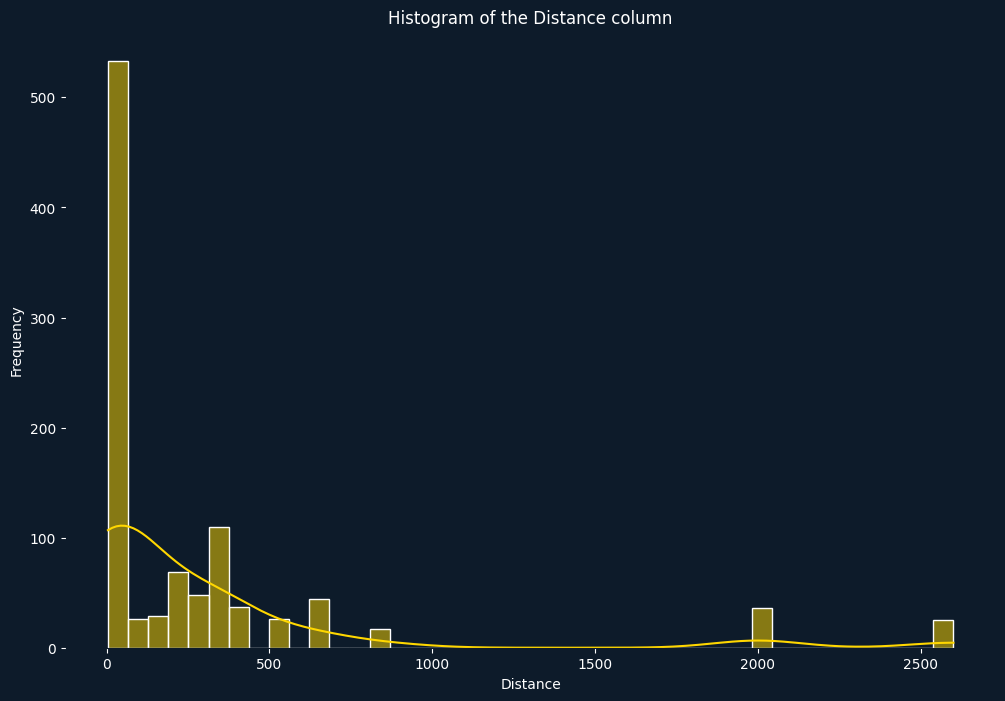

In [61]:

#fig = px.histogram(df, x= 'Name', color='Spectral Class', title= 'Histogram of Name with respect to Spectral Class')
#fig.show()

# histogram of the Distance column:

plt.figure(figsize=(12, 8))
sns.histplot(df['Distance'], kde=True, color='gold')
plt.title("Histogram of the Distance column")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

# histogram of Distance column with respect to Name Class using plotly:

#plt.figure(figsize=(12, 8))
#fig = px.histogram(df, x='Name', title='Histogram of Name column')
#fig.show()


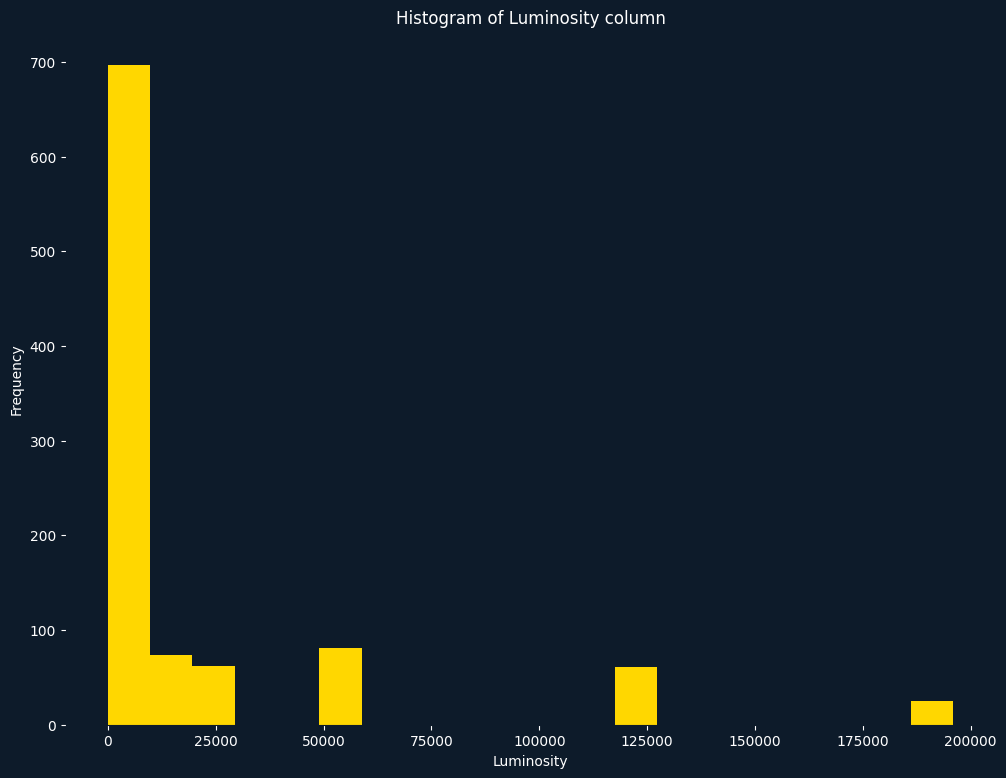

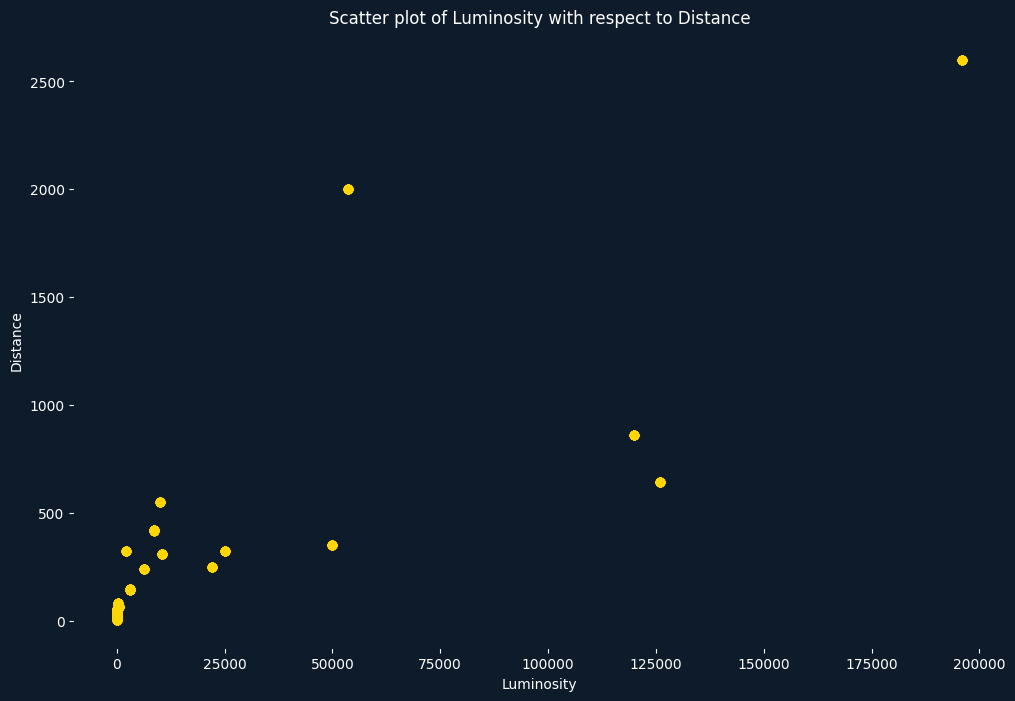

In [62]:
df['Luminosity'].describe()
plt.figure(figsize=(12, 9))
plt.hist(df['Luminosity'], bins=20, color='gold')
plt.title("Histogram of Luminosity column")
plt.xlabel("Luminosity")
plt.ylabel("Frequency")
plt.show()

#fig = plt.figure(figsize=(12, 8))
#fig = px.histogram(df, x='Luminosity', color='Name', title='Histogram of Luminosity with respect to Name')
#fig.show()

# lets try to make a scatter plot of Luminosity with respect to Distance using matplotlib:

plt.figure(figsize=(12, 8))
plt.scatter(df['Luminosity'], df['Distance'], color='gold')
plt.title("Scatter plot of Luminosity with respect to Distance")
plt.xlabel("Luminosity")
plt.ylabel("Distance")
plt.show()

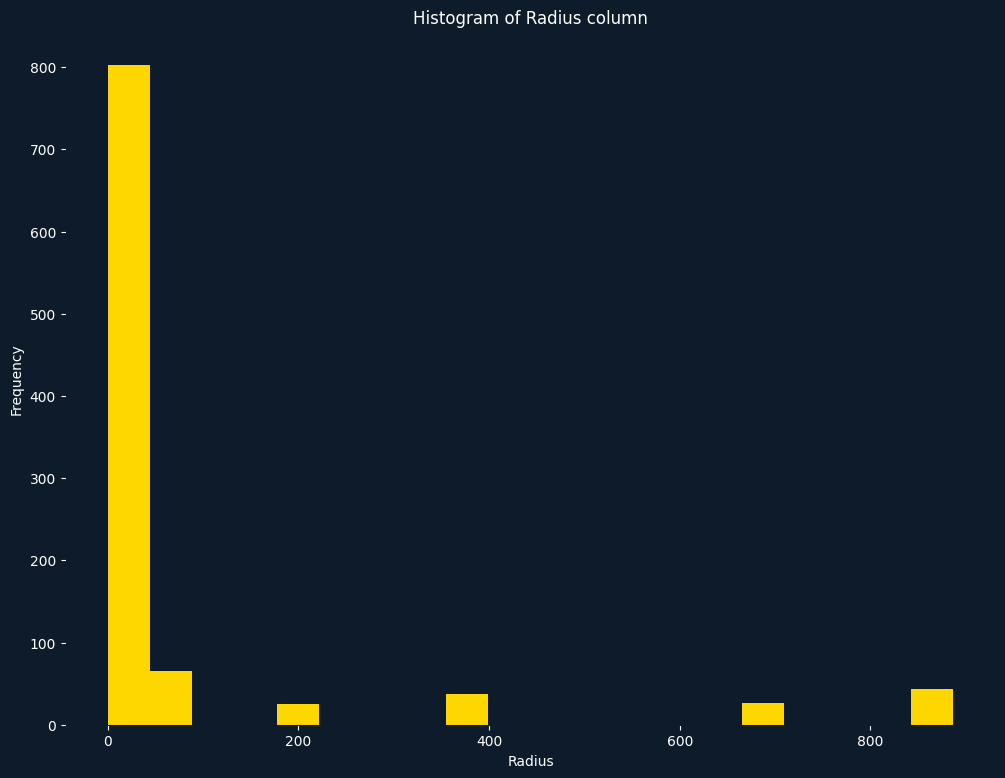

In [63]:
# lets make histogram of Radius column with respect to Name column using matplotlib:

plt.figure(figsize=(12, 9))
plt.hist(df['Radius'], bins=20, color='gold')
plt.title("Histogram of Radius column")
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.show()

# lets try the same plot using plotly:

#fig = plt.figure(figsize=(12, 8))
#fig = px.histogram(df, x='Radius', color='Name', title='Histogram of Radius with respect to Name')
#fig.show()



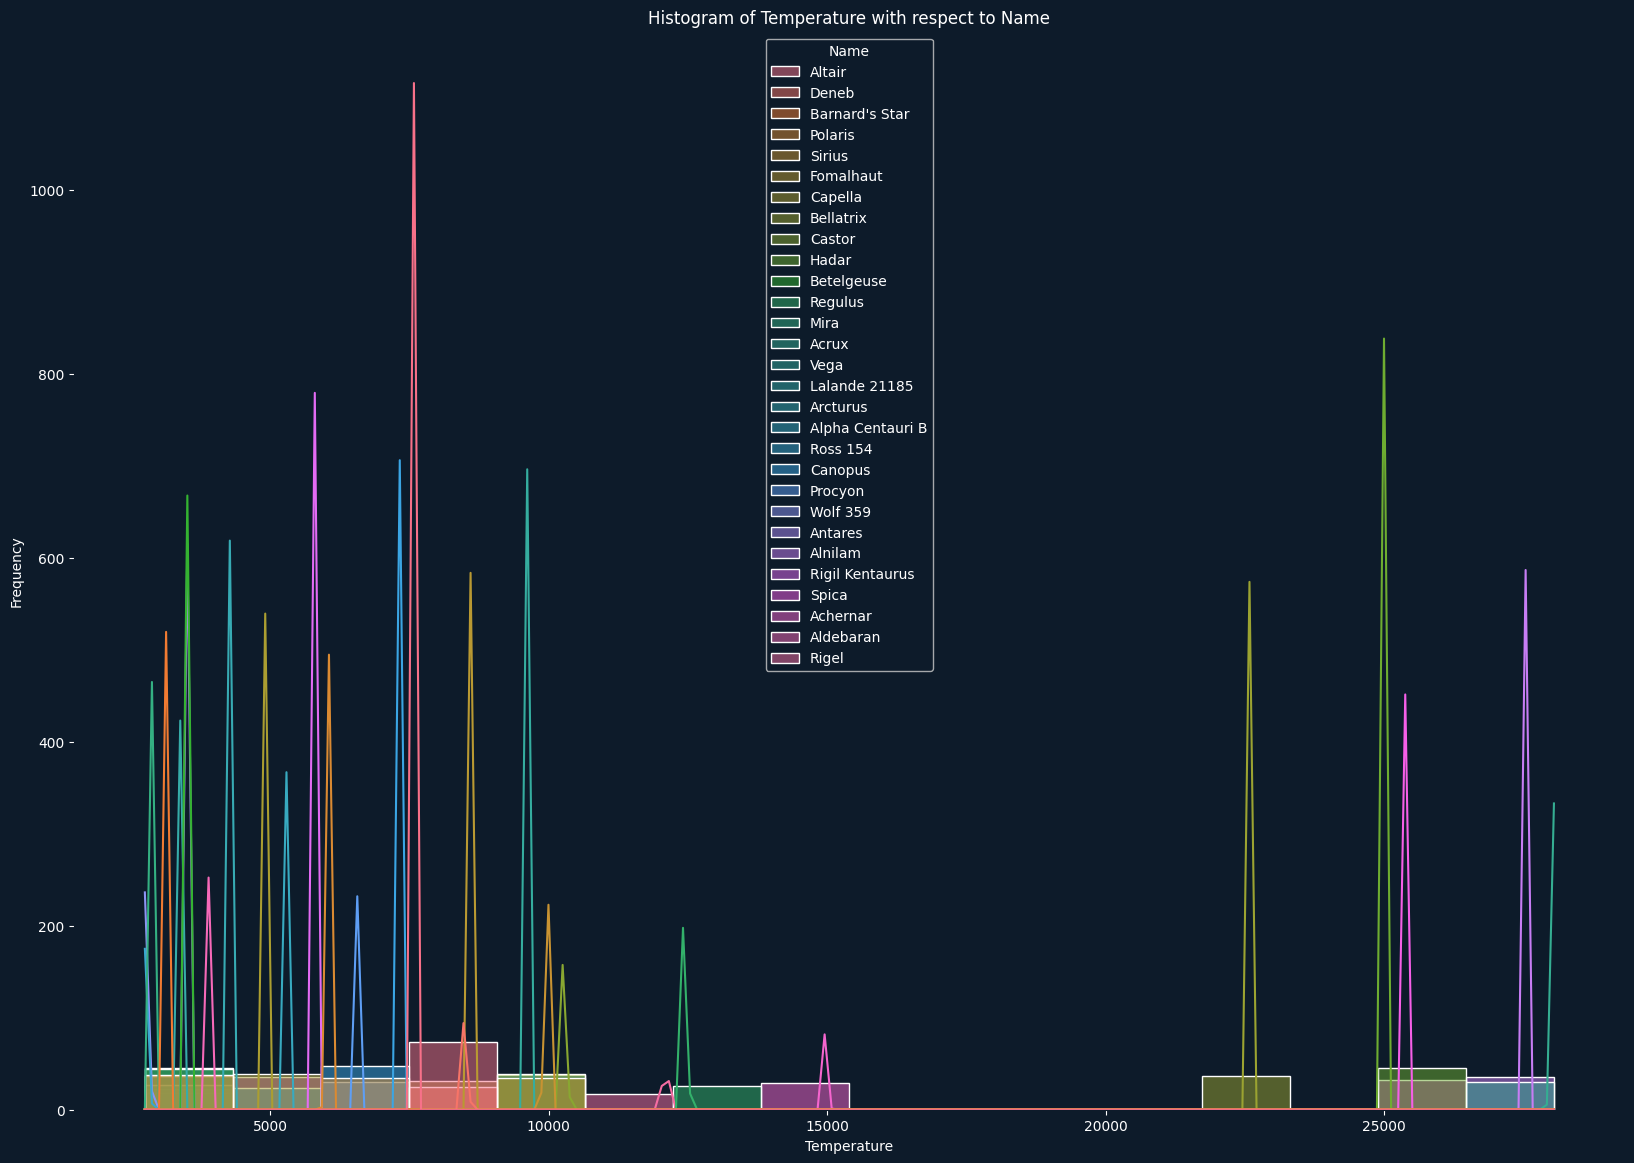

In [64]:
df['Temperature'].describe()

# lets make a histogram of `Temperature` column with respect to `Name` column using seaborn:

plt.figure(figsize=(20, 14))
sns.histplot(df, x='Temperature', hue='Name', kde=True, color='gold')
plt.title("Histogram of Temperature with respect to Name")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# lets try the same plot using plotly to have a better understanding:

#fig = plt.figure(figsize=(12, 8))
#fig = px.histogram(df, x='Temperature', color='Name', title='Histogram of Temperature with respect to Name')
#fig.show()



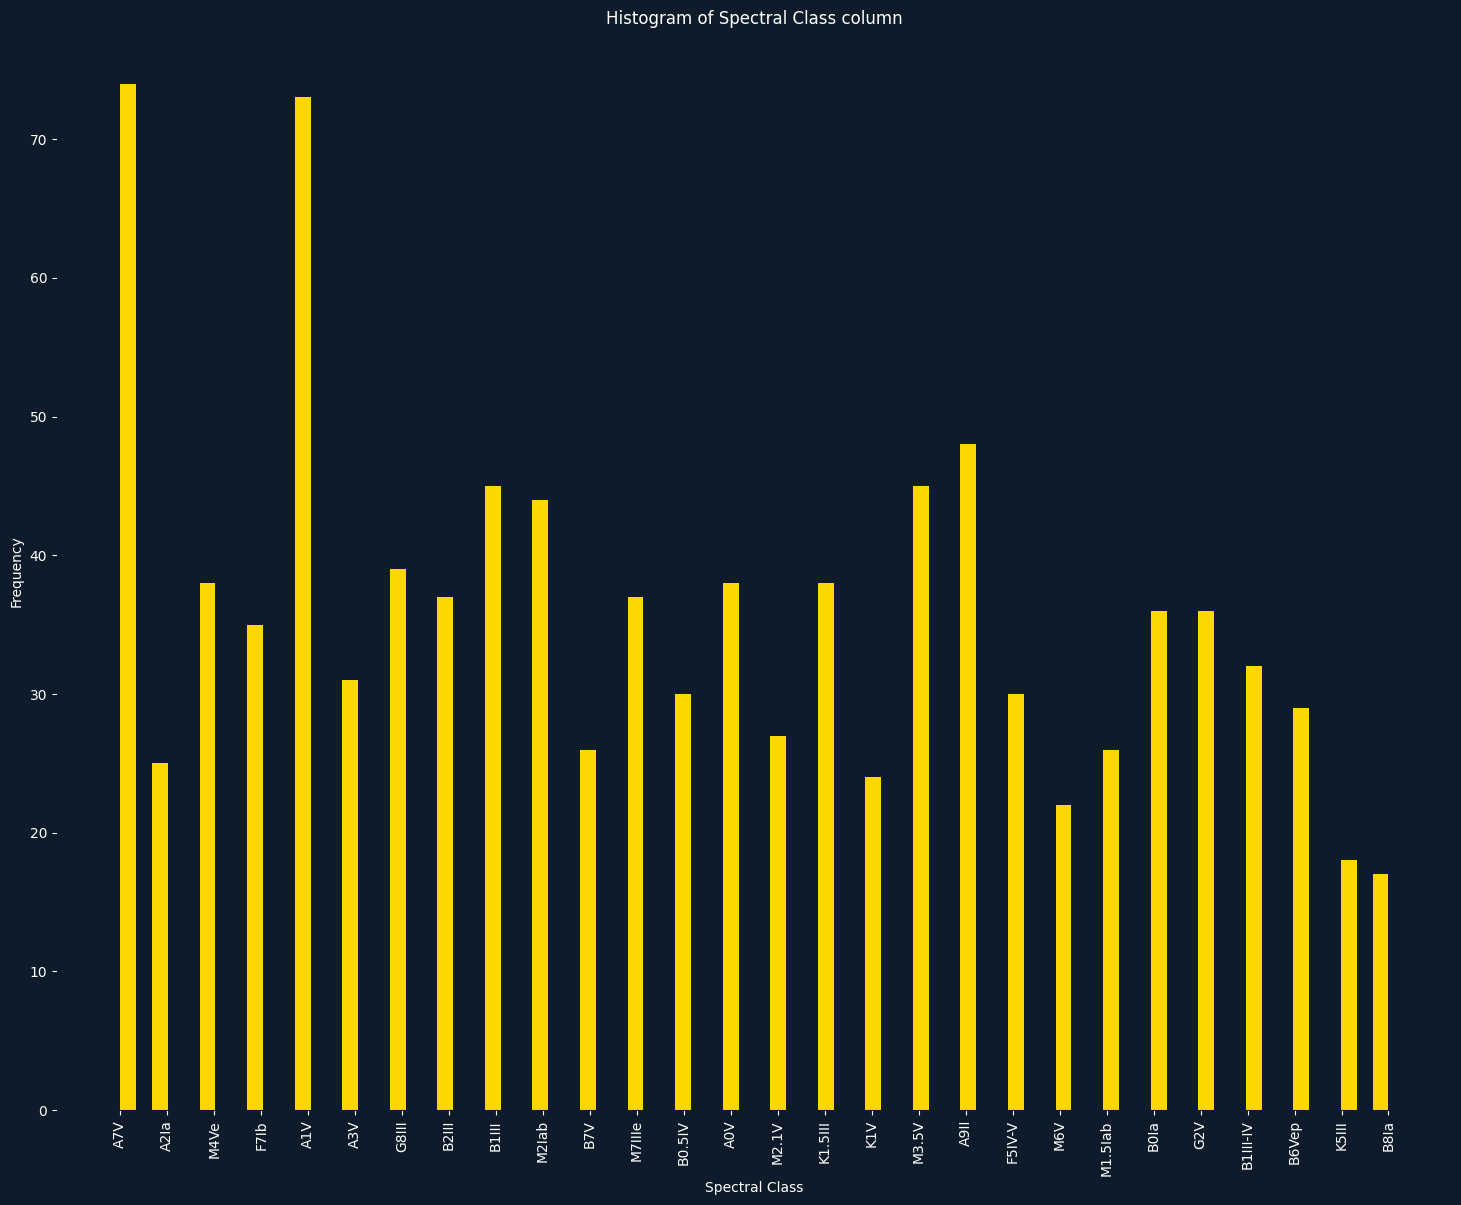

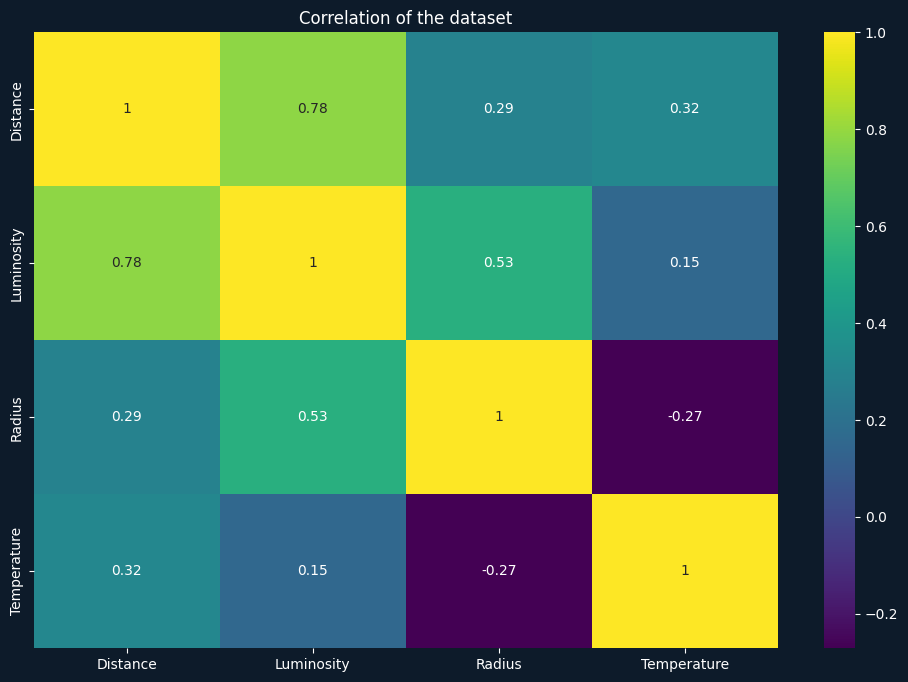

In [65]:
# lets make histogram of Spectral class column:

plt.figure(figsize=(18,14))
plt.hist(df['Spectral Class'], bins=80, color='gold')
plt.title("Histogram of Spectral Class column")
plt.xlabel("Spectral Class")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

#fig = px.scatter(df, x='Spectral Class', y='Distance', size='Radius', 
                 #color='Spectral Class', hover_name='Name',
                 #title='Bubble Chart of Spectral Class vs Distance',
                 #size_max=50)
#fig.show()



numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title("Correlation of the dataset")
plt.show()